In [1]:
all_logs = []
import os
for f in os.listdir():
    if '.log' in f:
        all_logs.append(f)

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Quantitative Data.csv')

In [4]:
df = df.drop('Age', axis=1)
df = df.drop('Fridge Avg. Open Time', axis=1)

<AxesSubplot:>

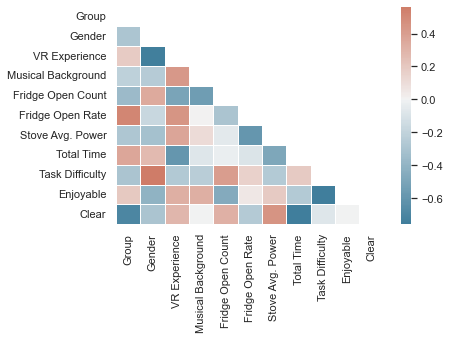

In [5]:
# https://www.researchgate.net/figure/Meaning-of-Pearson-correlation-coefficient-value-r_tbl1_299402589
sns.set_theme(style="white")
corr = df.corr() # Pearson correlation coefficient

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1)

In [6]:
df.corr().style.background_gradient(cmap='coolwarm')

,Group,Gender,VR Experience,Musical Background,Fridge Open Count,Fridge Open Rate,Stove Avg. Power,Total Time,Task Difficulty,Enjoyable,Clear
Group,1.000000,-0.288675,0.184637,-0.216506,-0.360288,0.515042,-0.286888,0.365948,-0.300376,0.193113,-0.696311
Gender,-0.288675,1.000000,-0.746203,-0.250000,0.346688,-0.169158,-0.322988,0.267910,0.563621,-0.408812,-0.301511
VR Experience,0.184637,-0.746203,1.000000,0.426401,-0.502616,0.442939,0.370791,-0.596588,-0.268059,0.316942,0.289271
Musical Background,-0.216506,-0.250000,0.426401,1.000000,-0.554700,0.005398,0.105592,-0.079999,-0.238455,0.325191,-0.000000
Fridge Open Count,-0.360288,0.346688,-0.502616,-0.554700,1.000000,-0.297022,-0.058572,-0.028846,0.402826,-0.458690,0.313591
Fridge Open Rate,0.515042,-0.169158,0.442939,0.005398,-0.297022,1.000000,-0.597333,-0.092766,0.156532,0.047890,-0.261740
Stove Avg. Power,-0.286888,-0.322988,0.370791,0.105592,-0.058572,-0.597333,1.000000,-0.486923,-0.263908,0.192060,0.453212
Total Time,0.365948,0.267910,-0.596588,-0.079999,-0.028846,-0.092766,-0.486923,1.000000,0.188485,-0.263254,-0.756511
Task Difficulty,-0.300376,0.563621,-0.268059,-0.238455,0.402826,0.156532,-0.263908,0.188485,1.000000,-0.757308,-0.078433
Enjoyable,0.193113,-0.408812,0.316942,0.325191,-0.458690,0.047890,0.192060,-0.263254,-0.757308,1.000000,-0.000000


In [89]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 930.9/930.9 kB 9.8 MB/s eta 0:00:00


In [2]:
all_logs

['vr_sound_0_ajda.log',
 'vr_sound_0_ao.log',
 'vr_sound_0_azalea.log',
 'vr_sound_0_bente.log',
 'vr_sound_0_fran.log',
 'vr_sound_0_hussein.log',
 'vr_sound_0_leo.log',
 'vr_sound_0_tao.log',
 'vr_sound_0_zhang.log']

In [76]:
import re
from datetime import datetime

def extract_using_time(line, source):
    if '|' not in line:
        return
    if source not in line:
        return
    using_time = float(line.split('|')[-1].strip().split(' ')[3])
    if using_time == 0:
        return
    return using_time

def extract_fire_speed_with_time(line):
    if 'Set gasfire speed' not in line:
        return
    time_str = re.search('\[.+\]', line).group(0)[1:-1]
    dt = datetime.strptime(time_str, '%m/%d %H:%M:%S.%f')
    speed = line.split(' ')[-1]
    return dt, float(speed)

def extract_time(line):
    time_str = re.search('\[.+\]', line).group(0)[1:-1]
    dt = datetime.strptime(time_str, '%m/%d %H:%M:%S.%f')
    return dt
    
def average_stove_speed(stove_dt_speed):
    duration = stove_dt_speed[-1][0] - stove_dt_speed[0][0]
    speed_sum = 0
    for i in range(1, len(stove_dt_speed)):
        dt1, speed1 = stove_dt_speed[i-1]
        dt2, speed2 = stove_dt_speed[i]
        speed_sum += (dt2 - dt1).total_seconds() * (speed1 + speed2) / 2
    return speed_sum / duration.total_seconds()

In [81]:
def analyze_log(log):
    with open(log, 'r') as f:
        lines = f.readlines()

    start_dt = extract_time(lines[0])
    end_dt = None
        
    fridge_using_times = []
    stove_dt_speed = []
    for line in lines:
        if 'Finish task3' in line:
            end_dt = extract_time(line)
        fridge_using_time = extract_using_time(line, 'FridgeOpenTime')
        if fridge_using_time is not None:
            if fridge_using_times == [] or fridge_using_time < fridge_using_times[-1]:
                fridge_using_times.append(fridge_using_time)
            if fridge_using_time > fridge_using_times[-1]:
                fridge_using_times[-1] = fridge_using_time
        dt_speed = extract_fire_speed_with_time(line)
        if dt_speed is not None:
            stove_dt_speed.append(dt_speed)
    if end_dt is None:
        end_dt = extract_time(lines[-1])
    fridge_open_count = len(fridge_using_times)
    avg_speed = average_stove_speed(stove_dt_speed)
    print(avg_speed)
    print(len(fridge_using_times))
    print(sum(fridge_using_times)/len(fridge_using_times))
    print((end_dt-start_dt).total_seconds())
    print('-------------------------')

In [82]:
for log in all_logs:
    print(log)
    analyze_log(log)

vr_sound_0_ajda.log
0.12020769222984465
2
96.093222
960.868
-------------------------
vr_sound_0_ao.log
0.4055080456136236
3
107.22986166666665
513.501
-------------------------
vr_sound_0_azalea.log
0.10477372504567031
5
141.46107039999998
687.868
-------------------------
vr_sound_0_bente.log
0.19205510042378748
2
26.73422
662.409
-------------------------
vr_sound_0_fran.log
0.2421603918355137
1
258.3722
745.851
-------------------------
vr_sound_0_hussein.log
0.011973974741175867
1
386.961
626.205
-------------------------
vr_sound_0_leo.log
0.5765080053145024
2
29.10512
532.982
-------------------------
vr_sound_0_tao.log
0.4010126269159439
2
64.66928250000001
572.677
-------------------------
vr_sound_0_zhang.log
0.5315166990136091
2
15.08556025
713.358
-------------------------
